<a href="https://colab.research.google.com/github/vasilyryabtsev/ml-hse-24-25/blob/main/ai_hw2_gd_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

a) $${f(x)=x^2-30x+1\rightarrow extr}$$
$${f'(x)=2x-30=0 \rightarrow x_0=15}$$
$$f''(x)=2>0$$
$$x_0=15\;-\;min,\;f(x_0)=-224$$

b) $$g(x)=-x^3+5x-7x^2+17 \rightarrow extr$$
$$g'(x)=-3x^2+5-14x=0 \rightarrow x_{01}=\frac{1}{3},\;x_{02}=-5$$
$$g''(x)=-6x-14 \rightarrow g''(x_{01})=-16<0,\;g''(x_{02})=16>0$$
$$x_{01}=\frac{1}{3}\;-\;max,\;g(x_{01})=17\frac{23}{27}$$
$$x_{02}=-5\;-\;min,\;g(x_{02})=-58$$

c) $$h(x)=x^2-\frac{1}{x}\rightarrow extr$$
$$h'(x)=2x+\frac{1}{x^2}=\frac{2x^3+1}{x^2}=2\frac{(x+0.5^{\frac{1}{3}})(x^2-x+0.5)}{x^2}=0\rightarrow x_0=-0.5^{\frac{1}{3}}$$
$$h''(x)=2(1-\frac{1}{x^3})=2\frac{x^3-1}{x^3}=\rightarrow h''(x_0)=6>0$$
$$x_0=-0.5^{\frac{1}{3}}\approx -0.794\;-\;min,\;h(x_0) \approx 1.890$$

d) $$j(x)=\frac{1}{x^5}+x^{17}+8 \rightarrow extr$$
$$j'(x)=-\frac{5}{x^6}+17x^{16}=\frac{-5+17x^{22}}{x^6}=\frac{(\sqrt{17}x^{11}-\sqrt{5})(\sqrt{17}x^{11}+\sqrt{5})}{x^6}=0$$
$$j'(x)=0 \rightarrow \frac{(\sqrt{17}x^{11}-\sqrt{5})(\sqrt{17}x^{11}+\sqrt{5})}{x^6}=0 \rightarrow x_{01}=(\frac{5}{17})^{\frac{1}{22}},\;x_{02}=-(\frac{5}{17})^{\frac{1}{22}}$$
$$j''(x)=\frac{30}{x^7}+272x^{15} \rightarrow j''(x_{01}) \approx 162.368>0,\;\rightarrow j''(x_{02}) \approx -162.368<0 $$
$$x_{01} \approx 0.946\;-\;min,\;j(x_{01})=9.709$$
$$x_{02} \approx -0.946\;-\;max,\;j(x_{02})=6.291$$

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

In [1]:
import sympy as sp

x = sp.Symbol('x')

# Функции
f = lambda x: x ** 2 - 30 * x + 1
g = lambda x: - x ** 3 + 5 * x - 7 * x ** 2 + 17
h = lambda x: x ** 2 - 1 / x
j = lambda x: 1 / (x ** 5) + x ** 17 + 8

# 1-е производные
dfdx = sp.diff(f(x), x)
dgdx = sp.diff(g(x), x)
dhdx = sp.diff(h(x), x)
djdx = sp.diff(j(x), x)

# 2-е производные
d2fdx2 = sp.diff(dfdx, x)
d2gdx2 = sp.diff(dgdx, x)
d2hdx2 = sp.diff(dhdx, x)
d2jdx2 = sp.diff(djdx, x)

def real_sol(solutions):
    '''
    Возвращает, только действительные решения (без комплексной части).
    '''
    return [sp.re(sol.evalf()) for sol in solutions if sp.im(sol.evalf()) == 0]

# Критические точки
dfdx_sol = real_sol(sp.solve(dfdx, x))
dgdx_sol = real_sol(sp.solve(dgdx, x))
dhdx_sol = real_sol(sp.solve(dhdx, x))
djdx_sol = real_sol(sp.solve(djdx, x))

def minmax(solutions, diff2, func):
    '''
    Определяет характер экстремума.
    '''
    results = []
    for sol in solutions:
        res = diff2.subs(x, sol).evalf()
        extr = None
        if res > 0:
            extr = 'min'
        elif res < 0:
            extr = 'max'
        else:
            extr = 'inflection point'
        y = func.subs(x, sol)
        results.append((sol, y, extr))
    return results

# Определение характера критических точек
f_extr = minmax(dfdx_sol, d2fdx2, f(x))
g_extr = minmax(dgdx_sol, d2gdx2, g(x))
h_extr = minmax(dhdx_sol, d2hdx2, h(x))
j_extr = minmax(djdx_sol, d2jdx2, j(x))

print(f'f(x): {f_extr}')
print(f'g(x): {g_extr}')
print(f'h(x): {h_extr}')
print(f'j(x): {j_extr}')

f(x): [(15.0000000000000, -224.000000000000, 'min')]
g(x): [(-5.00000000000000, -58.0000000000000, 'min'), (0.333333333333333, 17.8518518518519, 'max')]
h(x): [(-0.793700525984100, 1.88988157484231, 'min')]
j(x): [(-0.945892686121557, 6.29091200972848, 'max'), (0.945892686121557, 9.70908799027152, 'min')]


In [2]:
def get_points(solution, func):
    '''
    Возвращает список точек состоящий из (x, func(x)).
    '''
    res = []
    if len(solution) > 0:
        for sol in solution:
            res.append((sol, func.subs(x, sol)))
    return res

extr_points = {f: get_points([sol[0] for sol in f_extr], f(x)),
               g: get_points([sol[0] for sol in g_extr], g(x)),
               h: get_points([sol[0] for sol in h_extr], h(x)),
               j: get_points([sol[0] for sol in j_extr], j(x))}

## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

$f''(x)=2 \rightarrow$ точек перегиба нет

$$g''(x)=-6x-14=0 \rightarrow x_{п}=-2\frac{1}{3}=-2.334,\;g(x_п)\approx -20.074$$

$$h''(x)=2\frac{x^3-1}{x^3}=0$$
$$\frac{(x-1)(x^2+x+1)}{x^3}=0 \rightarrow x_п=1,\;h(x_п)=0$$

$j''(x)=\frac{30}{x^7}+272x^{15}=\frac{30+272x^{22}}{x^7} \rightarrow$ точек перегиба нет

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [3]:
d2fdx2_sol = real_sol(sp.solve(d2fdx2, x))
d2gdx2_sol = real_sol(sp.solve(d2gdx2, x))
d2hdx2_sol = real_sol(sp.solve(d2hdx2, x))
d2jdx2_sol = real_sol(sp.solve(d2jdx2, x))
            
inflection_points = {f: get_points(d2fdx2_sol, f(x)),
                     g: get_points(d2gdx2_sol, g(x)),
                     h: get_points(d2hdx2_sol, h(x)),
                     j: get_points(d2fdx2_sol, j(x))}

print(f'f(x): {inflection_points[f]}')
print(f'g(x): {inflection_points[g]}')
print(f'h(x): {inflection_points[h]}')
print(f'j(x): {inflection_points[j]}')

f(x): []
g(x): [(-2.33333333333333, -20.0740740740741)]
h(x): [(1.00000000000000, 0)]
j(x): []


### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

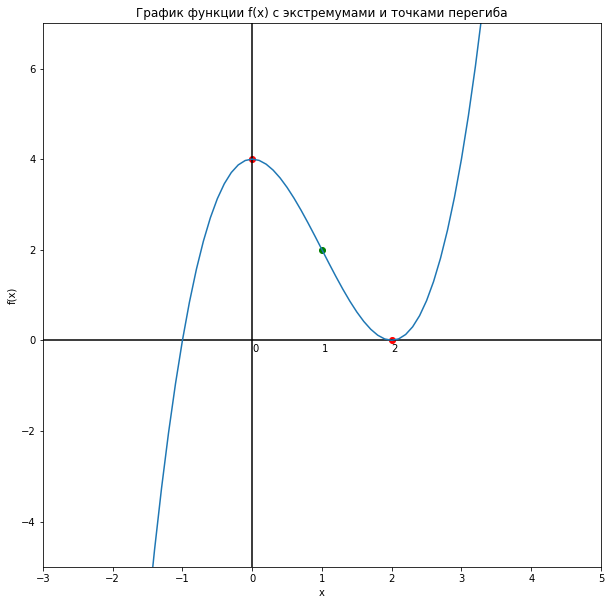

In [4]:
def xy_val(points):
    '''
    Возвращает два списка: список x координат и y координат.
    '''
    x_vals = []
    y_vals = []
    
    for point in points:
        x_vals.append(point[0])
        y_vals.append(point[1])
        
    return x_vals, y_vals

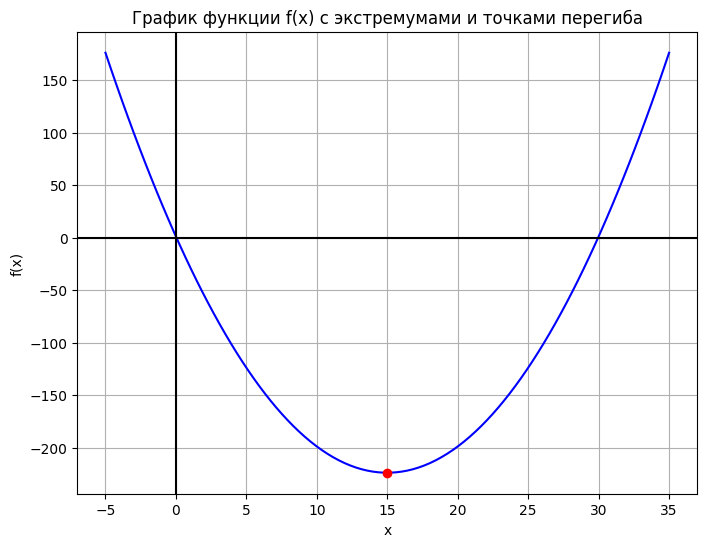

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f_plot(x_min=-5, x_max=35, n_points=100):
    x_vals = np.linspace(x_min, x_max, n_points)
    y_vals = f(x_vals)

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, color='blue')

    plt.scatter(*xy_val(extr_points[f]), color='red', zorder=5)
    plt.scatter(*xy_val(inflection_points[f]), color='green', zorder=5)

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('График функции f(x) c экстремумами и точками перегиба')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.grid()

f_plot()
plt.show()


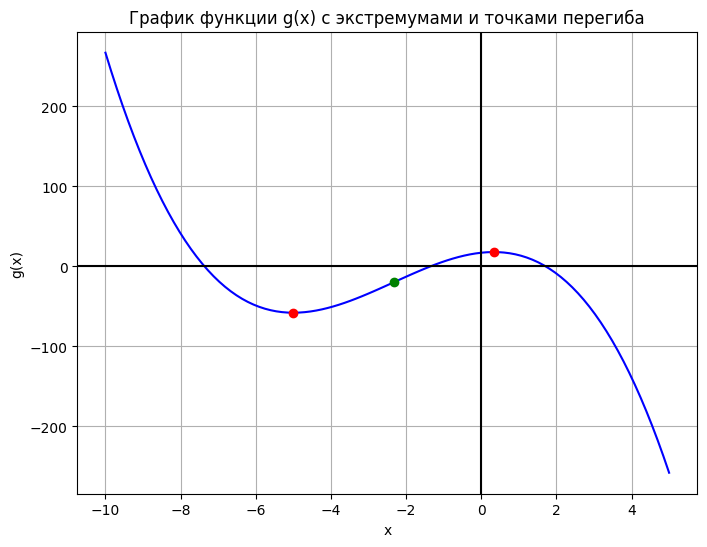

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def g_plot(x_min=-10, x_max=5, n_points=100):
    x_vals = np.linspace(x_min, x_max, n_points)
    y_vals = g(x_vals)

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, color='blue')

    plt.scatter(*xy_val(extr_points[g]), color='red', zorder=5)
    plt.scatter(*xy_val(inflection_points[g]), color='green', zorder=5)

    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.title('График функции g(x) c экстремумами и точками перегиба')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.grid()

g_plot()
plt.show()

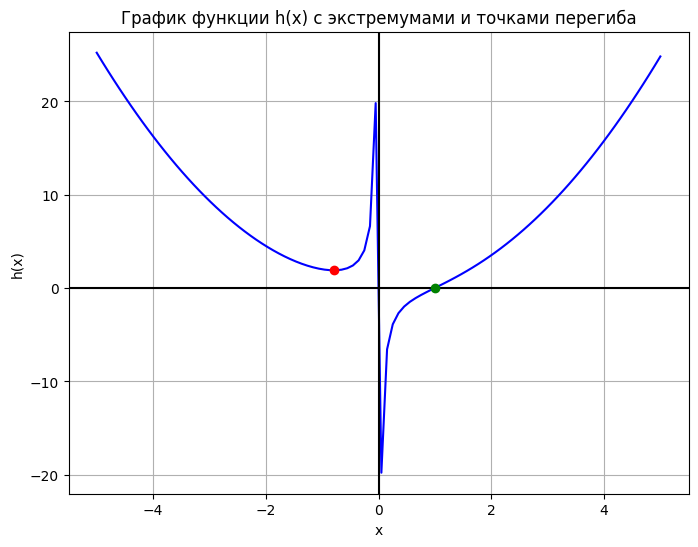

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def h_plot(x_min=-5, x_max=5, n_points=100):
    x_vals = np.linspace(x_min, x_max, n_points)
    y_vals = h(x_vals)

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, color='blue')

    plt.scatter(*xy_val(extr_points[h]), color='red', zorder=5)
    plt.scatter(*xy_val(inflection_points[h]), color='green', zorder=5)

    plt.xlabel('x')
    plt.ylabel('h(x)')
    plt.title('График функции h(x) c экстремумами и точками перегиба')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.grid()

h_plot()
plt.show()

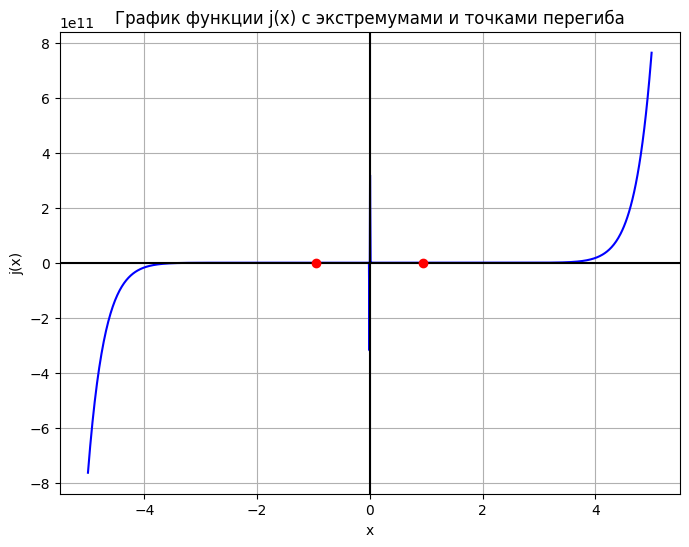

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def j_plot(x_min=0.28, x_max=1.5, n_points=1000):
    x_vals = np.linspace(x_min, x_max, n_points)
    y_vals = j(x_vals)

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, color='blue')

    plt.scatter(*xy_val(extr_points[j]), color='red', zorder=5)
    plt.scatter(*xy_val(inflection_points[j]), color='green', zorder=5)

    plt.xlabel('x')
    plt.ylabel('j(x)')
    plt.title('График функции j(x) c экстремумами и точками перегиба')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.grid()

j_plot(-5, 5)
plt.show()

In [9]:
plots = {f: f_plot,
         g: g_plot,
         h: h_plot,
         j: j_plot}

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [10]:
def gradient_descent(func, x_start, learning_rate, epsilon, num_iterations, delta):
    '''
    Градиентный спуск.
    '''
    x_curr = x_start
    df_x = sp.diff(func(x)) # производная

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
      df_x_curr = df_x.subs(x, x_curr)

      if abs(df_x_curr) < delta:
          return x_curr, trace

      x_new = x_curr - learning_rate * df_x_curr
      trace.append(x_new)

      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace

      x_curr = x_new

    return x_curr, trace

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [11]:
def plot_op(func, xmin, trace, ha='left', va='top', va_delta=0):
    '''
    Строит график работы метода оптимизации. 
    '''
    plots[func]()
    trace_values = [func(x) for x in trace]
    
    plt.scatter(trace, trace_values, c='orange', zorder=4)
    plt.text(xmin, func(xmin) + va_delta, f'Xmin: ({xmin:.2f}, {func(xmin):.2f})', fontsize=8, ha=ha, va=va)

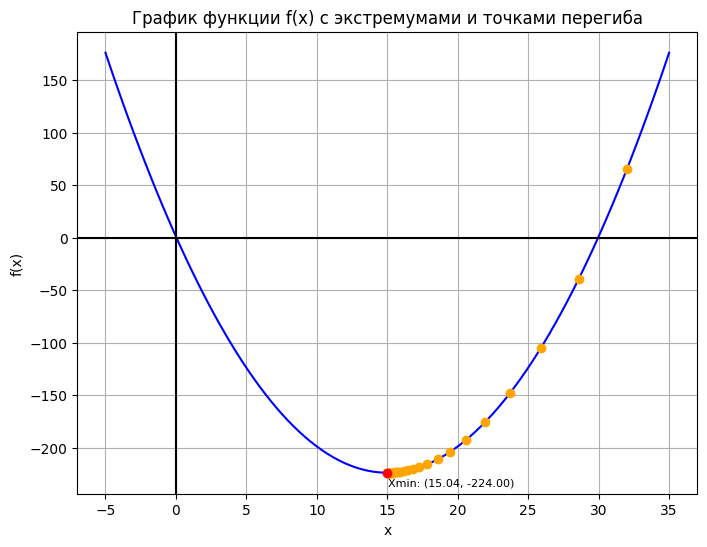

x_start=32; learning_rate=0.1


In [12]:
x_start = 32
learning_rate = 0.1

xmin, trace = gradient_descent(f, x_start, learning_rate, epsilon=0.01, num_iterations=100, delta=0.001)

plot_op(f, xmin, trace, va_delta=-5)

plt.show()

print(f'{x_start=}; {learning_rate=}')

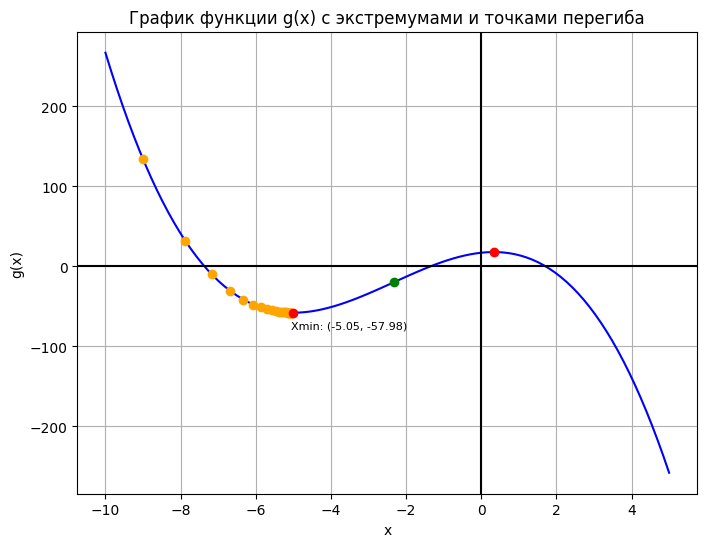

x_start=-9; learning_rate=0.01


In [13]:
x_start = -9
learning_rate = 0.01

xmin, trace = gradient_descent(g, x_start, learning_rate, epsilon=0.01, num_iterations=100, delta=0.001)

plot_op(g, xmin, trace, va_delta=-10)

plt.show()

print(f'{x_start=}; {learning_rate=}')

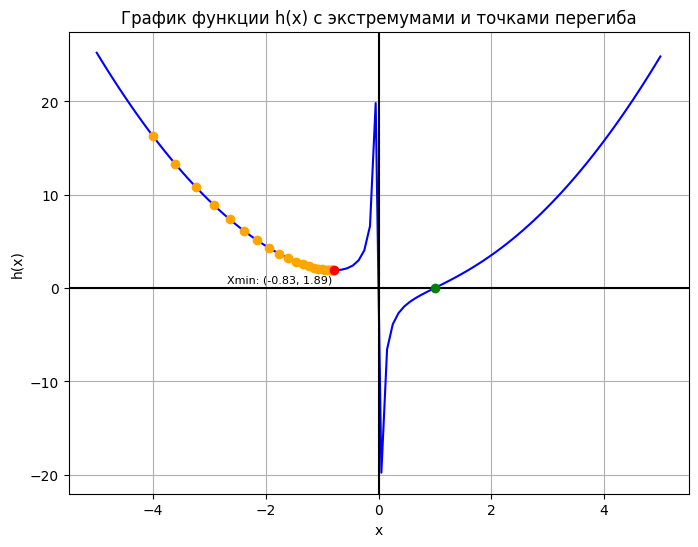

x_start=-4; learning_rate=0.05


In [14]:
x_start = -4
learning_rate = 0.05

xmin, trace = gradient_descent(h, x_start, learning_rate, epsilon=0.01, num_iterations=100, delta=0.001)

plot_op(h, xmin, trace, va_delta=-0.5, ha='right')

plt.show()

print(f'{x_start=}; {learning_rate=}')

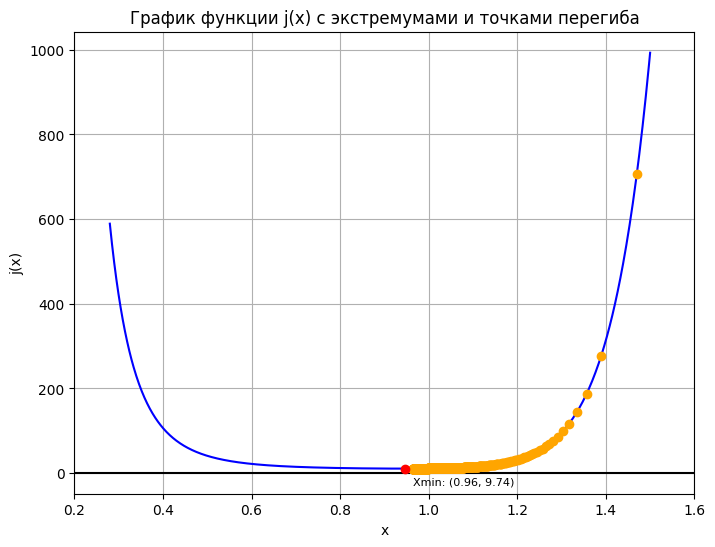

x_start=1.47; learning_rate=1e-05


In [15]:
x_start = 1.47
learning_rate = 0.00001

xmin, trace = gradient_descent(j, x_start, learning_rate, epsilon=0.00001, num_iterations=1000, delta=0.001)

plot_op(j, xmin, trace, va_delta=-20)

plt.xlim([0.2, 1.6])

plt.show()

print(f'{x_start=}; {learning_rate=}')

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [16]:
from itertools import count

def newton_method(func, x_start, epsilon, delta, num_iterations=None):
    '''
    Метод Ньютона для поиска локального минимума.
    '''
    x_curr = x_start
    df_x = sp.diff(func(x))
    d2f_x = sp.diff(df_x)

    trace = []
    trace.append(x_curr)
    
    c = count()
    
    while True:
        if num_iterations is not None:
            i = next(c)
            
            if i == num_iterations:
                return x_curr, trace
    
        df_x_curr = df_x.subs(x, x_curr)
        d2f_x_curr = d2f_x.subs(x, x_curr)
        
        if abs(df_x_curr) < delta:
            return x_curr, trace
        
        x_new = x_curr - df_x_curr / d2f_x_curr
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace

        x_curr = x_new

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

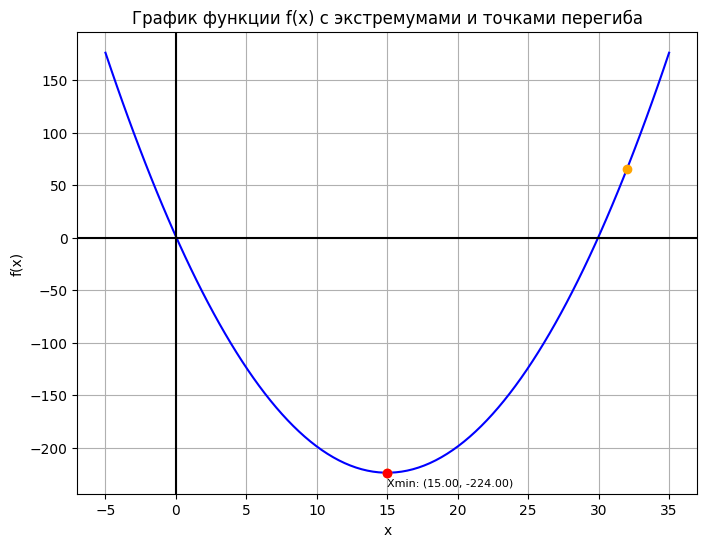

x_start=32


In [17]:
x_start = 32

xmin, trace = newton_method(f, x_start, epsilon=0.01, delta=0.001)

plot_op(f, xmin, trace, va_delta=-5)

plt.show()

print(f'{x_start=}')

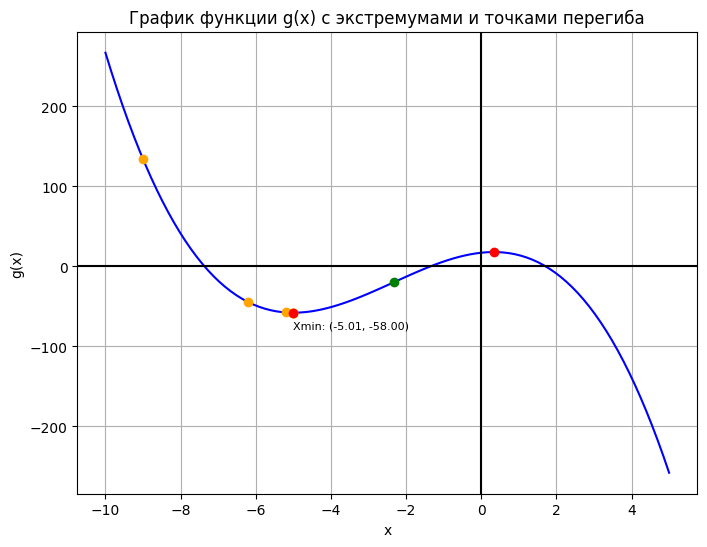

x_start=-9


In [18]:
x_start = -9

xmin, trace = newton_method(g, x_start, epsilon=0.01, delta=0.001)

plot_op(g, xmin, trace, va_delta=-10)

plt.show()

print(f'{x_start=}')

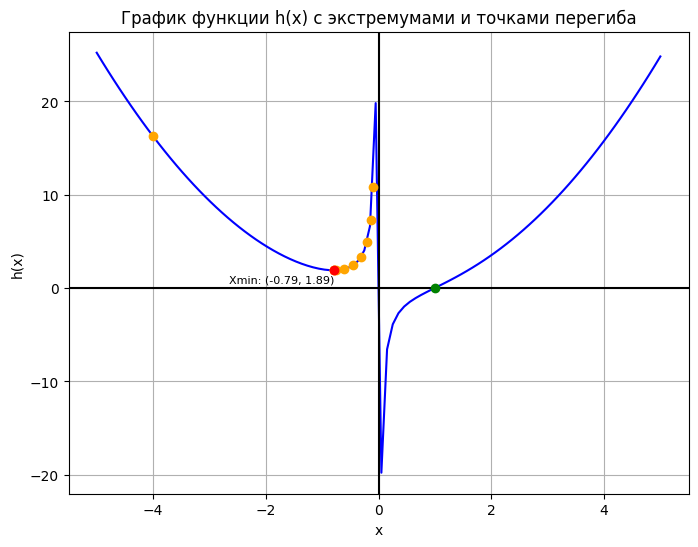

x_start=-4


In [19]:
x_start = -4

xmin, trace = newton_method(h, x_start, epsilon=0.01, delta=0.001)

plot_op(h, xmin, trace, va_delta=-0.5, ha='right')

plt.show()

print(f'{x_start=}')

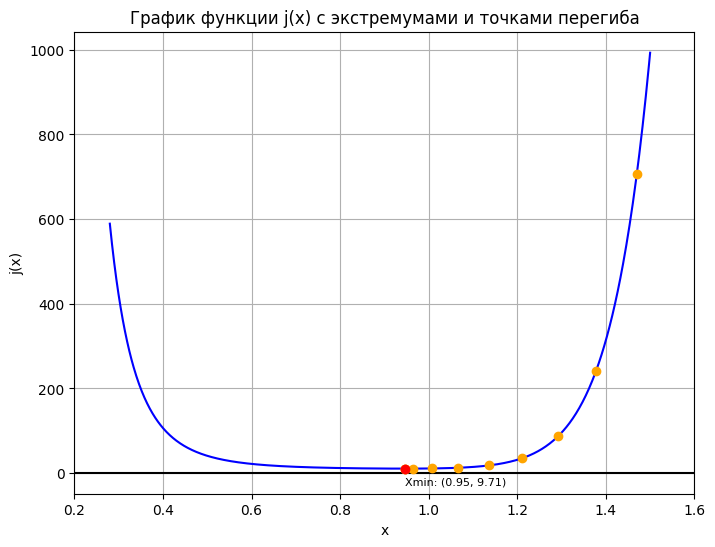

x_start=1.47


In [20]:
x_start = 1.47

xmin, trace = newton_method(j, x_start, epsilon=0.01, delta=0.001)

plot_op(j, xmin, trace, va_delta=-20)

plt.xlim([0.2, 1.6])

plt.show()

print(f'{x_start=}')

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [21]:
import time

def compare_x(func, x):
    '''
    Cравнивает аналитическое и численное значение.
    '''
    flag = False
    for e in extr_points[func]:
        if abs(e[0] - x) < 0.00001:
            flag = True
            break
    return flag

def error_x(func, x):
    '''
    Возвращает ошибку метода.
    '''
    res = []
    for e in extr_points[func]:
        res.append(abs(e[0] - x))
    return min(res)

def min_iter(func, x_start, learning_rate, num_iterations=100000):
    '''
    Возвращает и печатает данные о работе метода Ньютона и градиентного спуска.
    '''
    start_gd = time.time()
    xmin_gd, trace_gd = gradient_descent(func, x_start, learning_rate, epsilon=0.000001, num_iterations=num_iterations, delta=0.0000000001)
    end_gd = time.time() - start_gd 
    
    print(f'GD iterations: {len(trace_gd) - 1}')
    print(f'is answear correct: {compare_x(func, xmin_gd)}')
    print(f'time: {end_gd}')

    print('-------------')
    
    start_n = time.time()
    xmin_n, trace_n = newton_method(func, x_start, epsilon=0.000001, num_iterations=num_iterations, delta=0.0000000001)
    end_n = time.time() - start_n
    
    print(f'NM iterations: {len(trace_n) - 1}')
    print(f'is answear correct: {compare_x(func, xmin_n)}')
    print(f'time: {end_n}')
    
    return (len(trace_gd) - 1, end_gd, error_x(func, xmin_gd)), (len(trace_n) - 1, end_n, error_x(func, xmin_n))

In [22]:
f_gd, f_n = min_iter(f, 32, 0.5)

GD iterations: 1
is answear correct: True
time: 0.0014660358428955078
-------------
NM iterations: 1
is answear correct: True
time: 0.0007405281066894531


In [23]:
g_gd, g_n = min_iter(g, -9, 0.06)

GD iterations: 9
is answear correct: True
time: 0.023612499237060547
-------------
NM iterations: 6
is answear correct: True
time: 0.006238460540771484


In [24]:
h_gd, h_n = min_iter(h, -4, 0.2)

GD iterations: 10
is answear correct: True
time: 0.01720595359802246
-------------
NM iterations: 11
is answear correct: True
time: 2.530627489089966


In [25]:
j_gd, j_n = min_iter(j, 1.47, 0.00001)

GD iterations: 3041
is answear correct: False
time: 3.404550552368164
-------------
NM iterations: 11
is answear correct: True
time: 0.020287513732910156


In [26]:
print(f'average iterations for GD: {(f_gd[0] + g_gd[0] + h_gd[0]) / 3}')
print(f'average time for GD: {(f_gd[1] + g_gd[1] + h_gd[1]) / 3}')

average iterations for GD: 6.666666666666667
average time for GD: 0.014094829559326172


In [27]:
print(f'average iterations for NM: {(f_n[0] + g_n[0] + h_n[0] + j_n[0]) / 3}')
print(f'average time for NM: {(f_n[1] + g_n[1] + h_n[1] + j_n[1]) / 3}')

average iterations for NM: 9.666666666666666
average time for NM: 0.8526313304901123


`Метод градиентного спуска, в среднем, находит решение быстрее решение быстрее чем метод Ньютона, как по времени, так и по кол-ву шагов. При этом нужно учитывать, что методом градиентного спуска не всегда удается подобрать параметры, чтобы найти решение с заданной точностью, из-за необходимости подбора оптимального шага. В этом плане метод Ньютона оказывается более эффективным.`

In [28]:
f_gd, f_n = min_iter(f, 32, 0.5, num_iterations=10)

GD iterations: 1
is answear correct: True
time: 0.004303455352783203
-------------
NM iterations: 1
is answear correct: True
time: 0.0010738372802734375


In [29]:
g_gd, g_n = min_iter(g, -9, 0.06, num_iterations=10)

GD iterations: 9
is answear correct: True
time: 0.014452934265136719
-------------
NM iterations: 6
is answear correct: True
time: 0.00566554069519043


In [30]:
h_gd, h_n = min_iter(h, -4, 0.2, num_iterations=10)

GD iterations: 10
is answear correct: True
time: 0.02364349365234375
-------------
NM iterations: 10
is answear correct: True
time: 0.04788994789123535


In [31]:
j_gd, j_n = min_iter(j, 1.47, 0.00001, num_iterations=10)

GD iterations: 10
is answear correct: False
time: 0.0387883186340332
-------------
NM iterations: 10
is answear correct: True
time: 0.0033855438232421875


In [32]:
print(f'average error for GD: {(f_gd[2] + g_gd[2] + h_gd[2] + j_gd[2]) / 3}')
print(f'average error for NM: {(f_n[2] + g_n[2] + h_n[2] + j_n[2]) / 3}')

average error for GD: 0.103713546284423
average error for NM: 2.56664319427576E-10


`При числе итераций 10 минимальную среднюю ошибку показал метод Ньютона.`

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [33]:
# your code here

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [34]:
# your code here

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

`Кот Яны Журович`